In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import seaborn as sns
from keras.callbacks import Callback
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# User Input of the Dataset Paths :

In [2]:
sns.set_style("whitegrid")
import pandas as pd
train_dataset_path = input("Enter the path to the training dataset CSV file: ")
test_dataset_path = input("Enter the path to the testing dataset CSV file: ")
try:
    fashion_train_df = pd.read_csv(train_dataset_path, sep=',')
    fashion_test_df = pd.read_csv(test_dataset_path, sep=',')
    print("Datasets loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file paths and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Enter the path to the training dataset CSV file:  /kaggle/input/fashionmnist/fashion-mnist_train.csv
Enter the path to the testing dataset CSV file:  /kaggle/input/fashionmnist/fashion-mnist_test.csv


Datasets loaded successfully.


In [ ]:
# '/kaggle/input/fashionmnist/fashion-mnist_train.csv'
# '/kaggle/input/fashionmnist/fashion-mnist_test.csv'

# Data Analysis (Task:1)

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
print("Number of missing values in training data:")
print(fashion_train_df.isnull().sum())
print("\nNumber of missing values in test data:")
print(fashion_test_df.isnull().sum())

Number of missing values in training data:
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Number of missing values in test data:
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [9]:
train = np.array(fashion_train_df, dtype='float32')
test = np.array(fashion_test_df, dtype='float32')

In [10]:
train.shape

(60000, 785)

In [11]:
test.shape

(10000, 785)

In [12]:
total_train_samples = fashion_train_df.shape[0]
print("Total number of data in the training dataset:", total_train_samples)
total_test_samples = fashion_test_df.shape[0]
print("Total number of data in the test dataset:", total_test_samples)

Total number of data in the training dataset: 60000
Total number of data in the test dataset: 10000


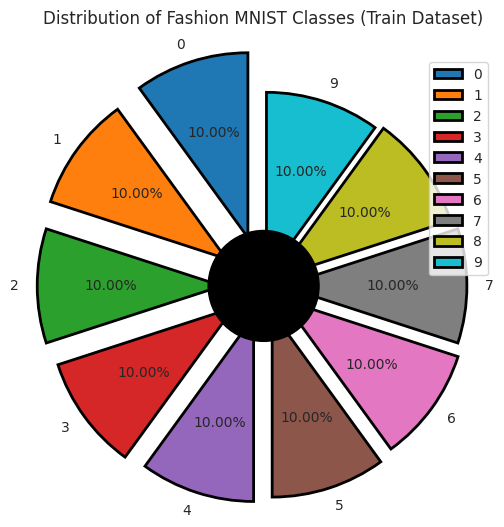

In [13]:
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


Number = fashion_train_df.label.value_counts().values
Label = [class_labels[label] for label in fashion_train_df.label.value_counts().index]
circle = plt.Circle((0, 0), 0.3, color="black")
explodeTuple = (0.275, 0.25, 0.225, 0.2, 0.175, 0.15, 0.125, 0.1, 0.075, 0.05)

plt.figure(figsize=(6, 6))
plt.pie(Number, labels=class_labels, autopct='%1.2f%%', explode=explodeTuple, startangle=90,
        wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
circle = plt.Circle((0, 0), 0.3, color="black")
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.title('Distribution of Fashion MNIST Classes (Train Dataset)', y=1.05) 
plt.show()

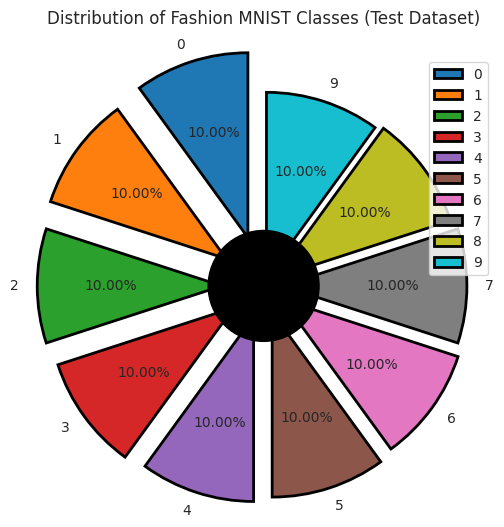

In [14]:
Number2 = fashion_test_df.label.value_counts().values
Label2 = [class_labels[label] for label in fashion_test_df.label.value_counts().index]
circle2 = plt.Circle((0, 0), 0.3, color="black")
explodeTuple = (0.275, 0.25, 0.225, 0.2, 0.175, 0.15, 0.125, 0.1, 0.075, 0.05)

plt.figure(figsize=(6, 6))
plt.pie(Number2, labels=class_labels, autopct='%1.2f%%', explode=explodeTuple, startangle=90,
        wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
circle = plt.Circle((0, 0), 0.3, color="black")
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.title('Distribution of Fashion MNIST Classes (Test Dataset)', y=1.05) 
plt.show()

Text(0.5, 1.0, 'Shirt')

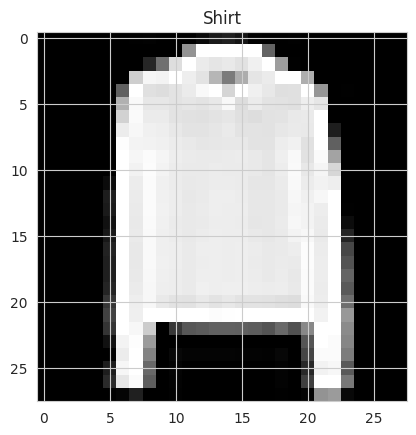

In [15]:
i = random.randint(1,60000)
plt.imshow(train[i,1:].reshape((28,28)))
plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') 
label_index = fashion_train_df["label"][i]
plt.title(f"{class_labels[label_index]}")

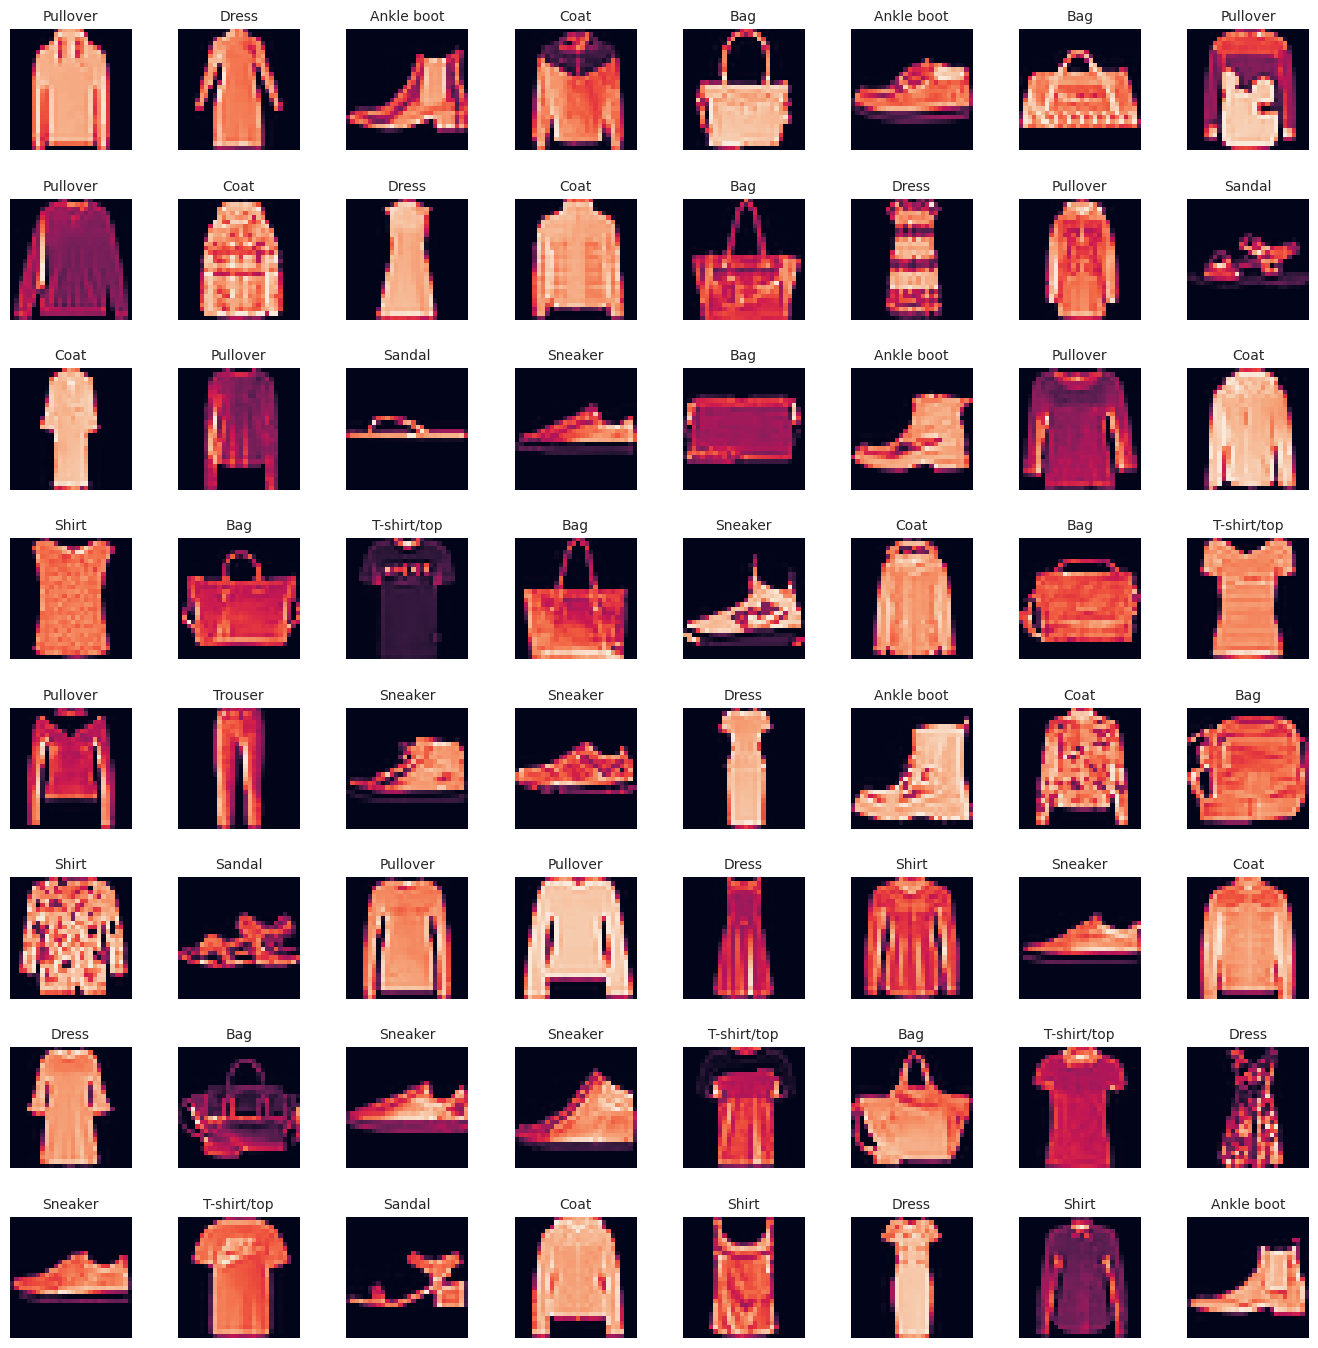

In [16]:
W_grid = 8
L_grid = 8
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel() 
n_train = len(train) 

for i in np.arange(0, W_grid * L_grid): 
    
    index = np.random.randint(0, n_train)    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_labels[label_index], fontsize=10)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [17]:
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

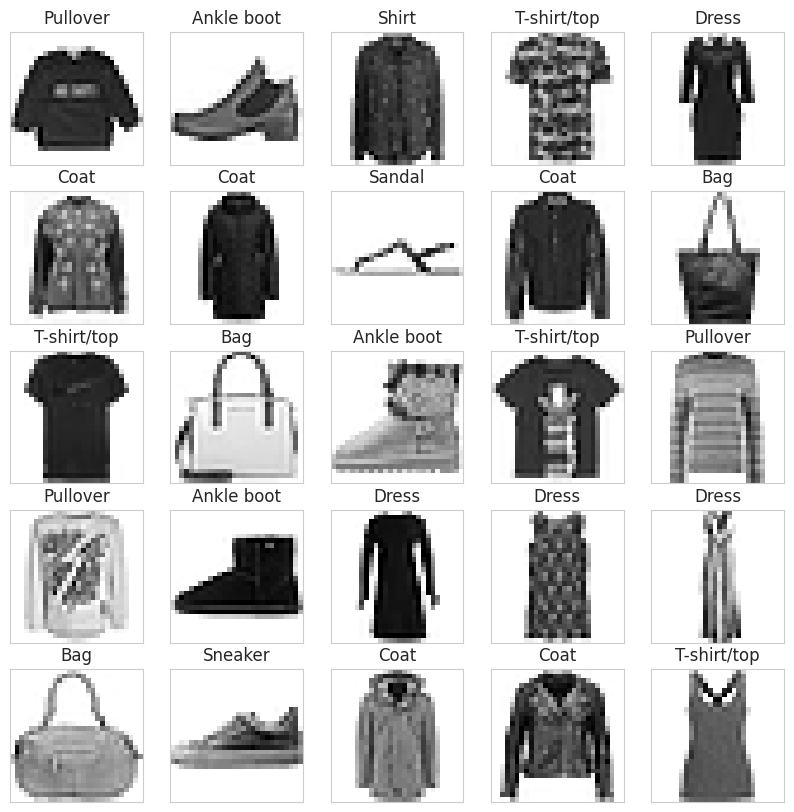

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_labels[label_index])
plt.show()
plt.tight_layout()

# Model Development (Task:2)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [20]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


# Model

In [21]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

In [22]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

## Train

In [23]:
class IncorrectPredictionsCallback(Callback):
    def __init__(self, X, y):
        super(Callback, self).__init__()
        self.X = X
        self.y = y
        self.incorrect_predictions = []

    def on_epoch_end(self, epoch, logs=None):
        predictions = np.argmax(self.model.predict(self.X), axis=1)
        incorrect_indices = np.where(predictions != self.y)[0]
        self.incorrect_predictions.append(incorrect_indices.tolist())

epochs = 2
batch_size = 512

incorrect_predictions_callback = IncorrectPredictionsCallback(X_train, y_train)
history = cnn_model.fit(
    X_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(X_validate, y_validate),
    callbacks=[incorrect_predictions_callback] 
)
last_epoch_incorrect_predictions_indices = incorrect_predictions_callback.incorrect_predictions[-1]
last_epoch_predictions = np.argmax(cnn_model.predict(X_train), axis=1)
wrong_predictions_df = pd.DataFrame({
    'Correct Label': y_train[last_epoch_incorrect_predictions_indices],
    'Predicted Label': last_epoch_predictions[last_epoch_incorrect_predictions_indices],
    'Image': [X_train[i] for i in last_epoch_incorrect_predictions_indices]
})

Epoch 1/2


2023-11-02 09:57:40.625811: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


94/94 [==============================] - 14s 67ms/step - loss: 0.6113 - accuracy: 0.7914 - val_loss: 1.5532 - val_accuracy: 0.8333
Epoch 2/2
1500/1500 [==============================] - 2s 2ms/step


In [24]:
incorrect_predictions_mask = np.ones(len(X_train), dtype=bool)
incorrect_predictions_mask[last_epoch_incorrect_predictions_indices] = False
X_train_filtered = X_train[incorrect_predictions_mask]
y_train_filtered = y_train[incorrect_predictions_mask]
print("Shape of X_train after removing incorrect predictions:", X_train_filtered.shape)
print("Shape of y_train after removing incorrect predictions:", y_train_filtered.shape)

Shape of X_train after removing incorrect predictions: (41052, 28, 28, 1)
Shape of y_train after removing incorrect predictions: (41052,)


In [25]:
wrong_predictions_df.head(10)

,Correct Label,Predicted Label,Image
0,2.0,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
1,0.0,2,"[[[0.0], [0.0], [0.0], [0.003921569], [0.00392..."
2,6.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
3,0.0,3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
4,6.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
5,0.0,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
6,6.0,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
7,6.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
8,6.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
9,6.0,3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."


In [26]:
number_of_rows = wrong_predictions_df.shape[0]
print("Number of rows present in the DataFrame:", number_of_rows)

Number of rows present in the DataFrame: 6948


#  0: 'T-shirt/top'
#  1: 'Trouser',
#  2: 'Pullover',
#  3: 'Dress',
#  4: 'Coat',
#  5: 'Sandal',
#  6: 'Shirt',
#  7: 'Sneaker',
#  8: 'Bag',
#  9: 'Ankle boot'

# Human-in-the-Loop (Task:3)

Enter the row number or 'E' to exit:  0


Original label: Pullover


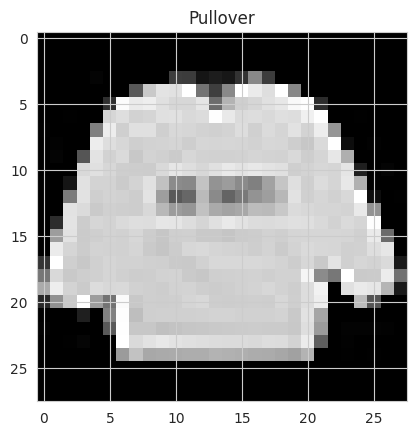

Enter the new label:  


Invalid input. Please enter a valid integer row number.


Enter the row number or 'E' to exit:  1


Original label: T-shirt/top


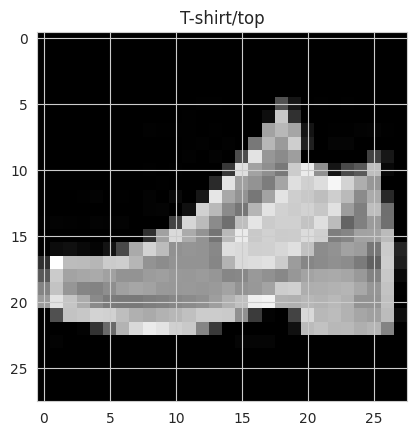

Enter the new label:  9


Label for row 1 updated to: Ankle boot


Enter the row number or 'E' to exit:  2


Original label: Shirt


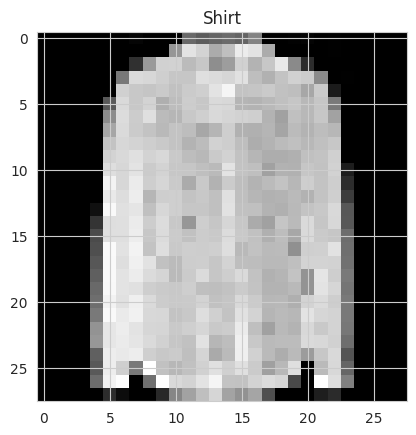

Enter the new label:  


Invalid input. Please enter a valid integer row number.


Enter the row number or 'E' to exit:  3


Original label: T-shirt/top


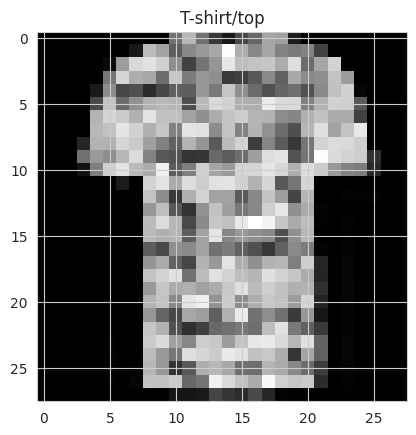

Enter the new label:  


Invalid input. Please enter a valid integer row number.


Enter the row number or 'E' to exit:  4


Original label: Shirt


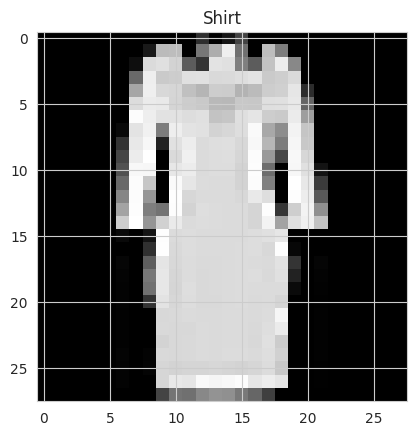

Enter the new label:  3


Label for row 4 updated to: Dress


Enter the row number or 'E' to exit:  5


Original label: T-shirt/top


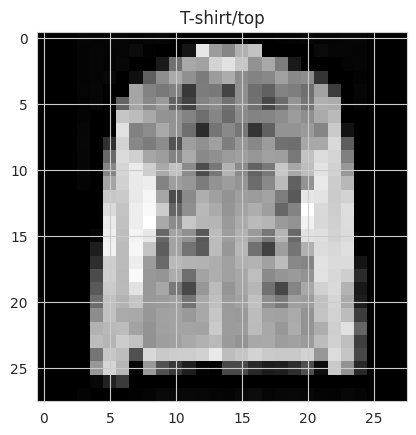

Enter the new label:  


Invalid input. Please enter a valid integer row number.


Enter the row number or 'E' to exit:  6


Original label: Shirt


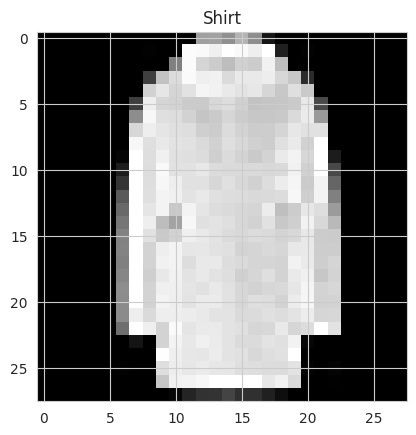

Enter the new label:  


Invalid input. Please enter a valid integer row number.


Enter the row number or 'E' to exit:  7


Original label: Shirt


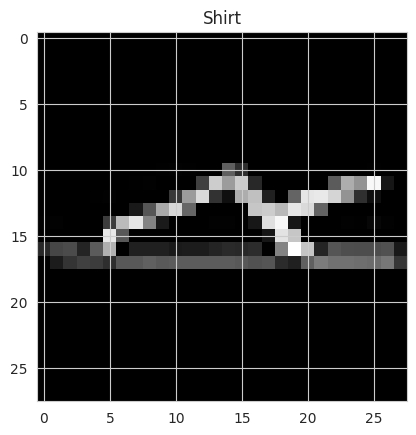

Enter the new label:  5


Label for row 7 updated to: Sandal


Enter the row number or 'E' to exit:  8


Original label: Shirt


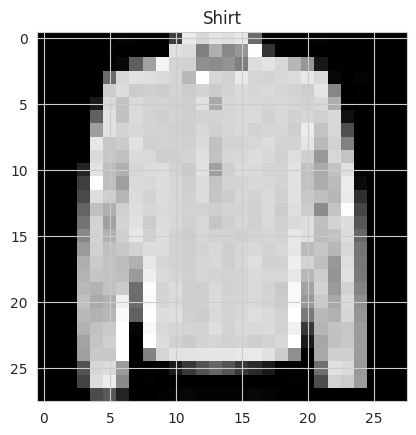

Enter the new label:  


Invalid input. Please enter a valid integer row number.


Enter the row number or 'E' to exit:  9


Original label: Shirt


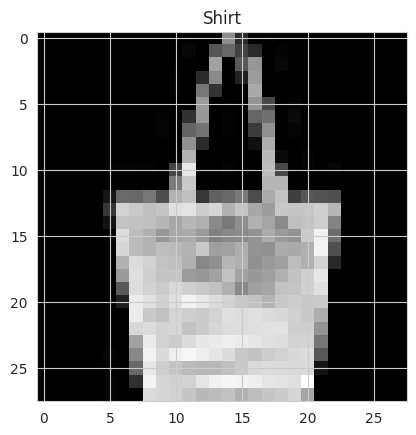

Enter the new label:  8


Label for row 9 updated to: Bag


Enter the row number or 'E' to exit:  10


Original label: Shirt


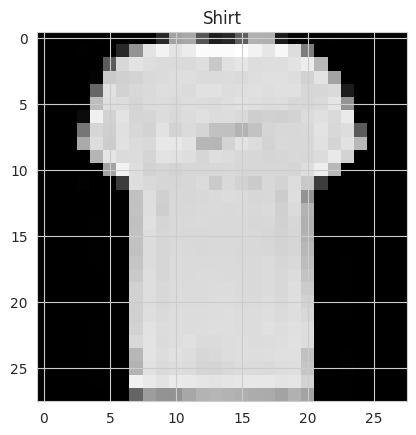

Enter the new label:  


Invalid input. Please enter a valid integer row number.


Enter the row number or 'E' to exit:  


Invalid input. Please enter a valid integer row number.


Enter the row number or 'E' to exit:  E


Exiting the loop. Bye!


In [27]:
while True:
    try:
        user_input = input("Enter the row number or 'E' to exit: ")
        
        if user_input.upper() == 'E':
            print("Exiting the loop. Bye!")
            break
        
        row_number = int(user_input)
        
        if row_number < 0 or row_number >= len(train):
            print("Invalid row number. Please enter a valid row number.")
        else:
            plt.imshow(train[row_number, 1:].reshape((28, 28)), cmap='gray')
            label_index = wrong_predictions_df["Correct Label"][row_number]
            print(f"Original label: {class_labels[label_index]}")
            plt.title(f"{class_labels[label_index]}")
            plt.show()
            
            new_label = int(input("Enter the new label: "))
            if 0 <= new_label < len(class_labels):
                wrong_predictions_df.at[row_number, "Correct Label"] = new_label
                print(f"Label for row {row_number} updated to: {class_labels[new_label]}")
            else:
                print("Invalid label. Please enter a valid label index.")
        
    except ValueError:
        print("Invalid input. Please enter a valid integer row number.")

Some labels in the dataset are wrong.

  RowNumber       ||      Label         ||       Human Expertise
 -----------------------------------------------------------------
   1                     T-shirt/top               Ankle Boot
   4                     Shirt                     Dress
   7                     Shirt                     Sandal
   9                     Shirt                     Bag
   ....                  ....                      ....
   ....                  ....                      ....
   
   
   Notice: Out of 10 wrong predictions 4 were labelled wrong in the dataset

In [29]:
# row 1,4,7,9 are corrected here which were wrong previously
wrong_predictions_df.head(10)

,Correct Label,Predicted Label,Image
0,2.0,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
1,9.0,2,"[[[0.0], [0.0], [0.0], [0.003921569], [0.00392..."
2,6.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
3,0.0,3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
4,3.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
5,0.0,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
6,6.0,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
7,5.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
8,6.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
9,8.0,3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."


Text(0.5, 1.0, 'Accuracy evolution')

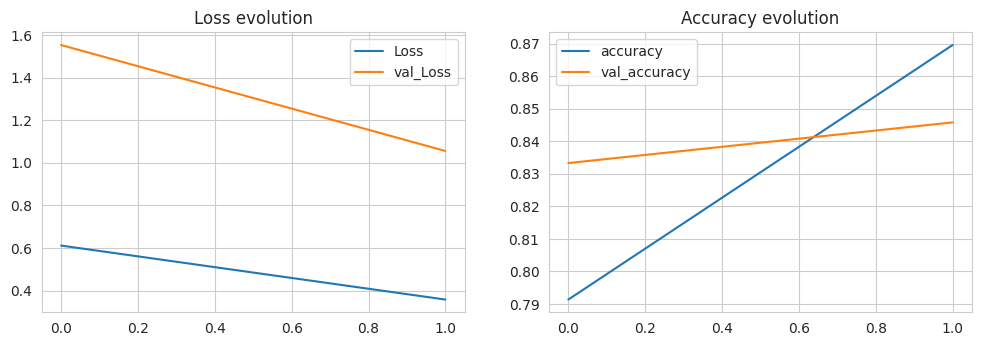

In [30]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [31]:
training_accuracy = history.history['accuracy']  
print("Training Accuracy:", training_accuracy[-1])
validation_accuracy = history.history['val_accuracy']  
print("Validation Accuracy:", validation_accuracy[-1])

Training Accuracy: 0.8696249723434448
Validation Accuracy: 0.8458333611488342


# Evaluation

In [32]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 1.0486 - accuracy: 0.8468
Test Accuracy : 0.847


In [33]:
num_rows = wrong_predictions_df.shape[0]
print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 6948


In [34]:
wrong_predictions_df.head()

,Correct Label,Predicted Label,Image
0,2.0,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
1,9.0,2,"[[[0.0], [0.0], [0.0], [0.003921569], [0.00392..."
2,6.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
3,0.0,3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
4,3.0,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."


In [35]:
x_train1 = np.array([np.array(vector) for vector in wrong_predictions_df['Image'].values])
y_train1 = wrong_predictions_df['Correct Label'].values
x_train1 = x_train1.reshape(-1, 28, 28, 1).astype('float32')  
x_train1 /= 255

In [36]:
x_train1 = np.array([np.array(vector) for vector in wrong_predictions_df['Image'].values])
x_train1 = x_train1.reshape(-1, 28, 28, 1).astype('float32')
x_train1 /= 255
# Adding updated label with the corrected predicted label data for retraining the model to perform well
x_trainNew = np.concatenate((X_train_filtered,x_train1), axis=0)
y_trainNew = np.concatenate((y_train_filtered, wrong_predictions_df['Correct Label'].values), axis=0)
print("Shape of x_train:", x_trainNew.shape)
print("Shape of y_train:", y_trainNew.shape)

Shape of x_train: (48000, 28, 28, 1)
Shape of y_train: (48000,)


In [37]:
print(x_trainNew.shape)
print(y_trainNew.shape)

(48000, 28, 28, 1)
(48000,)


In [38]:
epochs = 10
batch_size = 512

history = cnn_model.fit(
    x_trainNew, y_trainNew,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(X_validate, y_validate)
)

Epoch 1/10
94/94 [==============================] - 2s 19ms/step - loss: 0.3328 - accuracy: 0.8957 - val_loss: 0.6099 - val_accuracy: 0.8518
Epoch 2/10
94/94 [==============================] - 2s 17ms/step - loss: 0.2470 - accuracy: 0.9158 - val_loss: 0.4217 - val_accuracy: 0.8584
Epoch 3/10
94/94 [==============================] - 2s 17ms/step - loss: 0.2158 - accuracy: 0.9241 - val_loss: 0.3922 - val_accuracy: 0.8578
Epoch 4/10
94/94 [==============================] - 2s 17ms/step - loss: 0.2019 - accuracy: 0.9284 - val_loss: 0.4679 - val_accuracy: 0.8666
Epoch 5/10
94/94 [==============================] - 2s 17ms/step - loss: 0.1886 - accuracy: 0.9324 - val_loss: 0.4669 - val_accuracy: 0.8815
Epoch 6/10
94/94 [==============================] - 2s 18ms/step - loss: 0.1797 - accuracy: 0.9360 - val_loss: 0.5347 - val_accuracy: 0.8827
Epoch 7/10
94/94 [==============================] - 2s 18ms/step - loss: 0.1747 - accuracy: 0.9371 - val_loss: 0.6157 - val_accuracy: 0.8849
Epoch 8/10
94

Text(0.5, 1.0, 'Accuracy evolution')

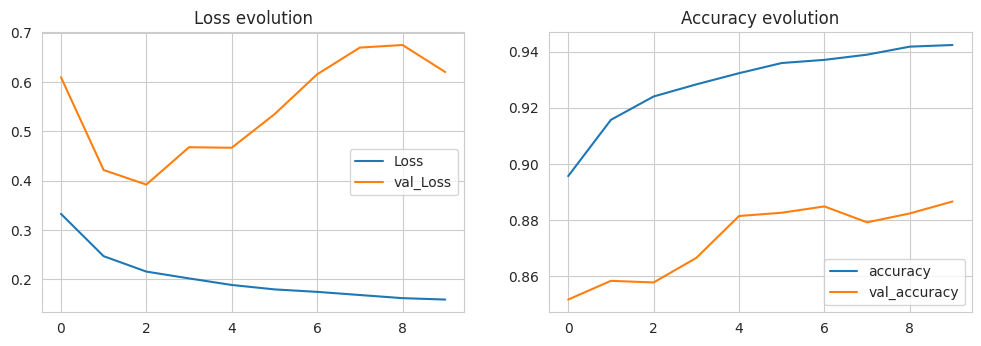

In [39]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [40]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.6133 - accuracy: 0.8889
Test Accuracy : 0.889


In [42]:
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]
np.argmax(prediction[0])

313/313 [==============================] - 1s 2ms/step


0

In [43]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 0s 2ms/step


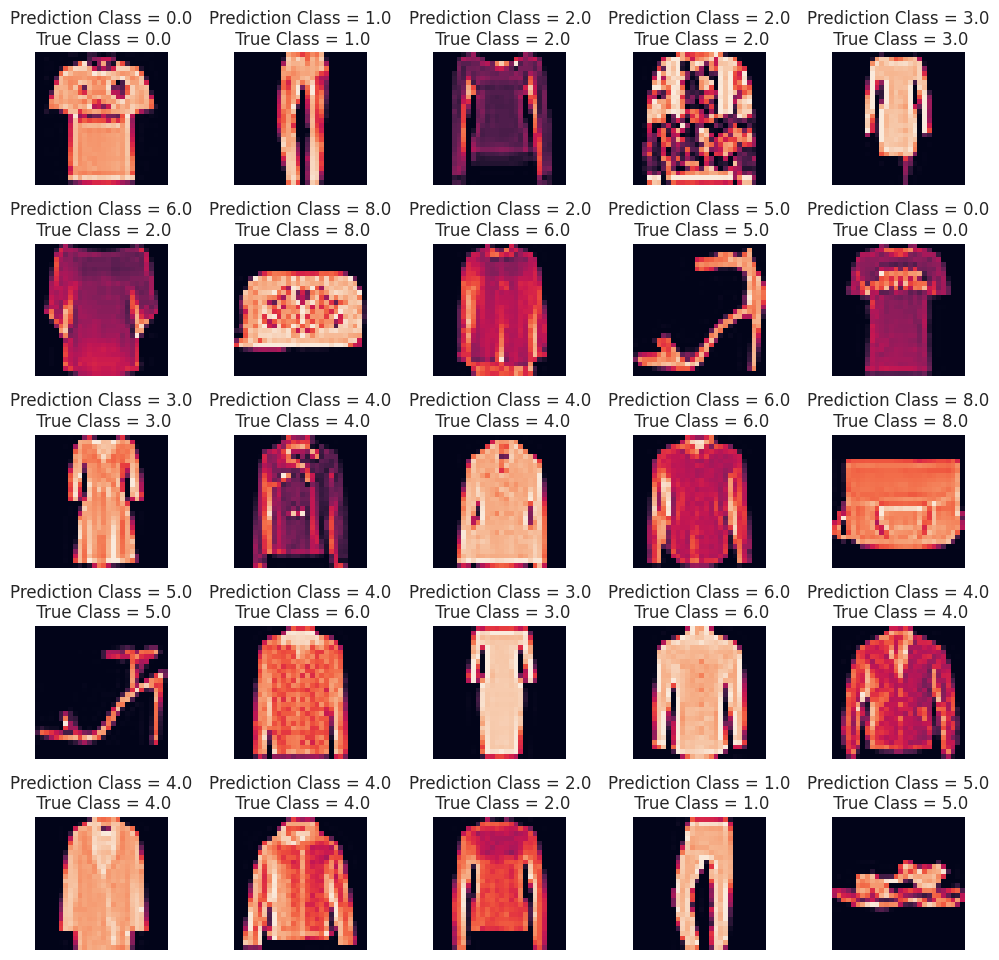

In [44]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

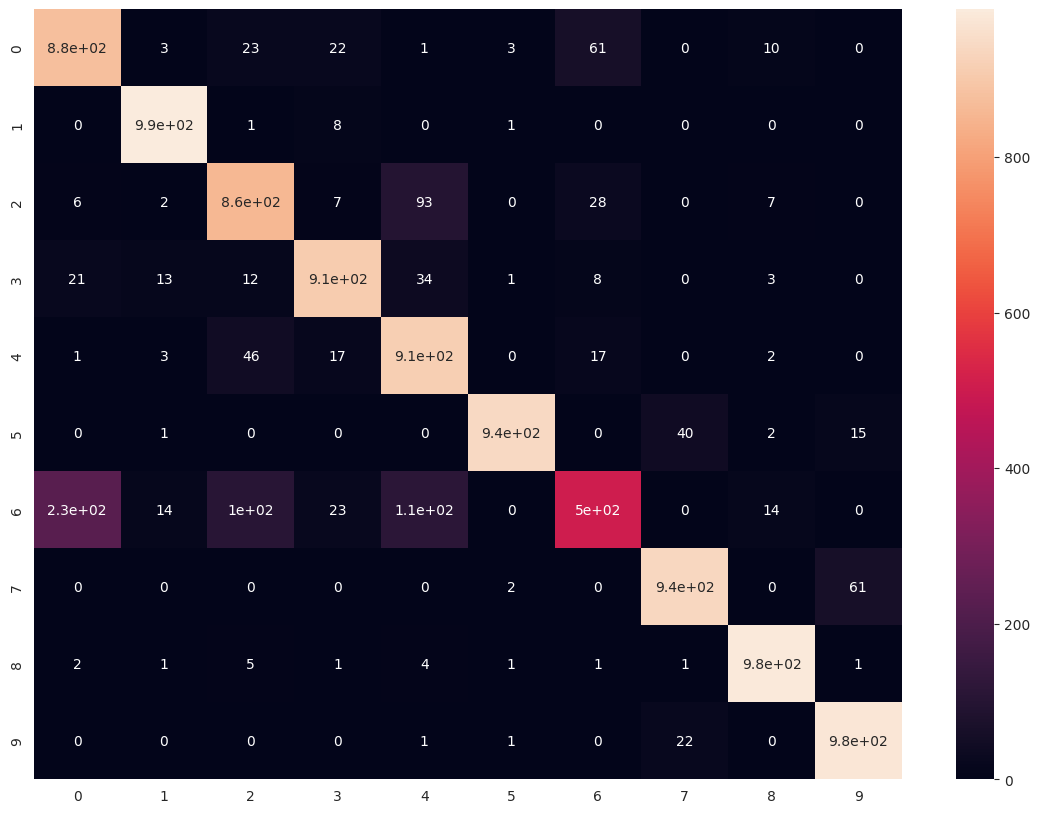

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [46]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.88      0.82      1000
     Class 1       0.96      0.99      0.98      1000
     Class 2       0.82      0.86      0.84      1000
     Class 3       0.92      0.91      0.91      1000
     Class 4       0.79      0.91      0.85      1000
     Class 5       0.99      0.94      0.97      1000
     Class 6       0.81      0.51      0.62      1000
     Class 7       0.94      0.94      0.94      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.93      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [48]:
from sklearn.metrics import classification_report
print(cnn_model.summary())
num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]
classification_rep = classification_report(y_test, predicted_classes, target_names=target_names)


with open('output.txt', 'w') as f:
    f.write('--- Output.txt ---\n\n')
    f.write('**Model\'s Architecture Summary:**\n')
    f.write('---------------------------------\n')
    cnn_model.summary(print_fn=lambda x: f.write(x + '\n'), line_length=150)
    f.write('\n**Evaluation Metrics:**\n')
    f.write('------------------------\n')
    f.write(f'Test Accuracy: {evaluation[1]:.3f}\n') 
    f.write('\n**Classification Report:**\n')
    f.write('------------------------\n')
    f.write(classification_rep)
    f.write('----------------------------------------\n')
    f.write('\n\n--- End of Output.txt ---\n')
    
print("Output.txt file has been generated.")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

# This commented part of the code will give over 92.5% accuracy. But 'Human-in-the-Loop' is absent here. Because of more number of epoch number the learning will be good and thus accuracy is 92.5%+ in this case.

In [ ]:

'''
epochs = 50
batch_size = 512

history = cnn_model.fit(
    X_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(X_validate, y_validate)
)





evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')






plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')







from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)





from sklearn.metrics import classification_report
num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))






from sklearn.metrics import classification_report
print(cnn_model.summary())
num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]
classification_rep = classification_report(y_test, predicted_classes, target_names=target_names)

with open('output.txt', 'w') as f:
    f.write('--- Output.txt ---\n\n')
    f.write('**Model\'s Architecture Summary:**\n')
    f.write('---------------------------------\n')
    cnn_model.summary(print_fn=lambda x: f.write(x + '\n'), line_length=150)
    f.write('\n**Evaluation Metrics:**\n')
    f.write('------------------------\n')
    f.write(f'Test Accuracy: {evaluation_metric:.3f}\n') 
    f.write('\n**Classification Report:**\n')
    f.write('------------------------\n')
    f.write(classification_rep)
    f.write('\n**Additional Insights or Observations:**\n')
    f.write('----------------------------------------\n')
    f.write(additional_insights)
    f.write('\n\n--- End of Output.txt ---\n')
    
print("Output.txt file has been generated.")


'''